   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigree  Age  Outcome  
0             0.627   50        1  
1             0.351   31        0  
2             0.672   32        1  
3             0.167   21        0  
4             2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Pregnancies       768 non-null    int64  
 1   Glucose           768 non-null    int64  
 2   BloodPressure     768 non-null    int64  
 3   SkinThi

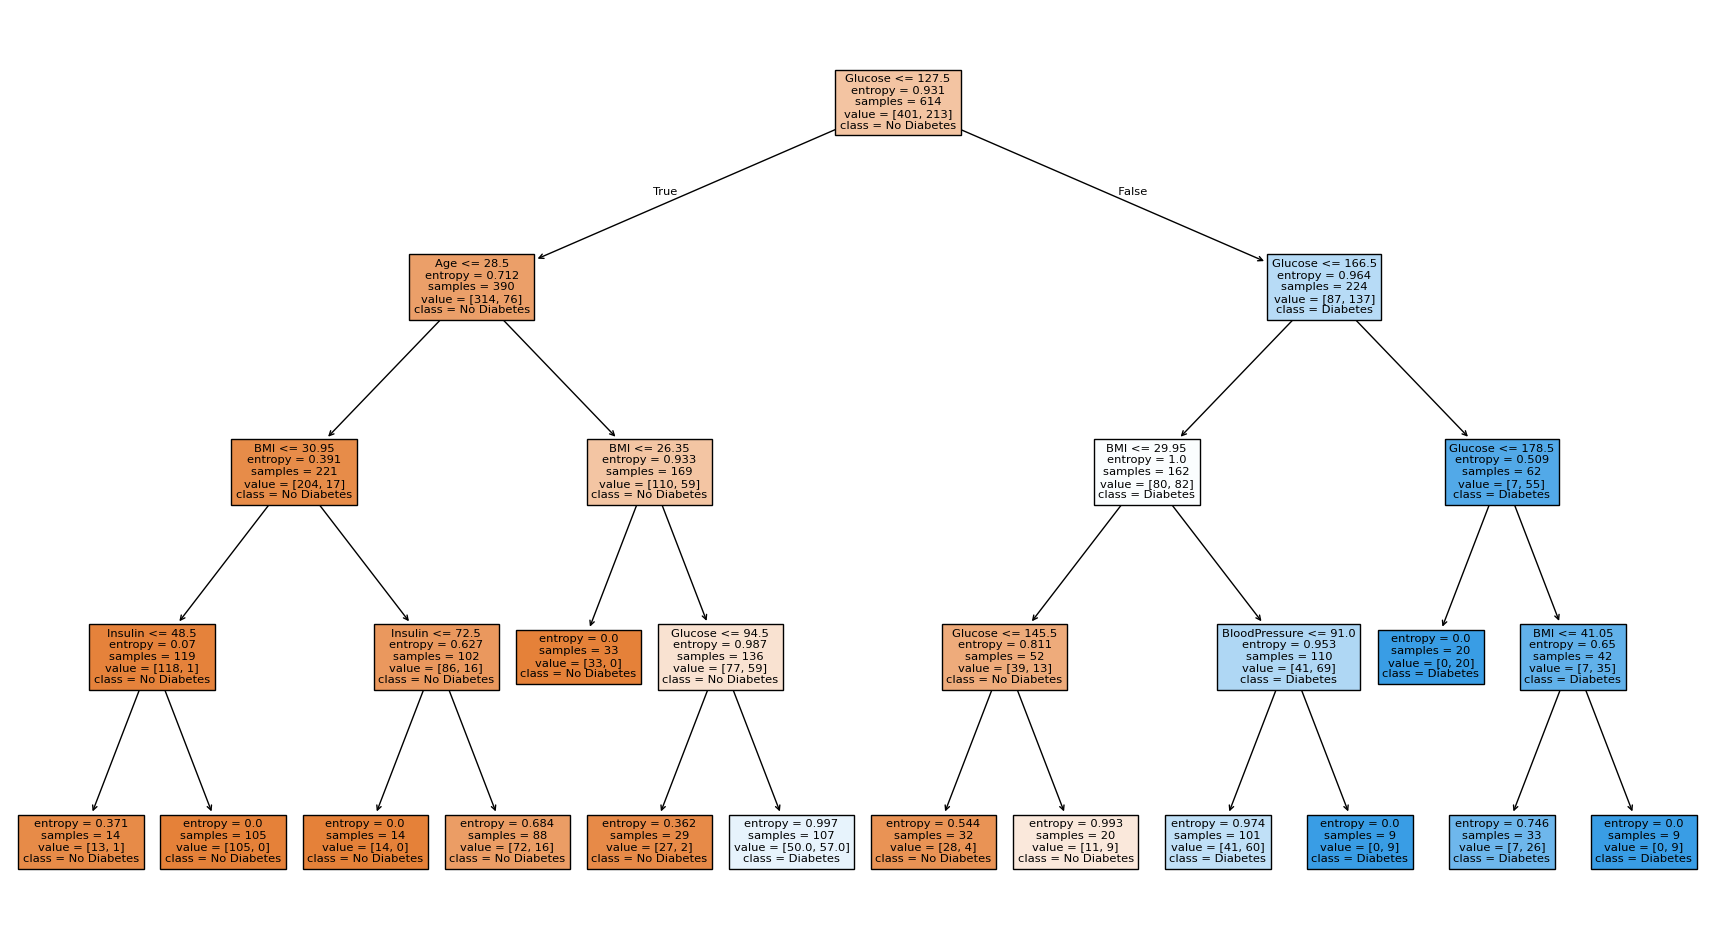


Random Sample:
      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
728            2    175.0           88.0           29.0    125.0  22.9   

     DiabetesPedigree  Age  
728             0.326   22  
Prediction: [1]


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load dataset properly
columns = [
    'Pregnancies',
    'Glucose',
    'BloodPressure',
    'SkinThickness',
    'Insulin',
    'BMI',
    'DiabetesPedigree',
    'Age',
    'Outcome'
]

df = pd.read_csv('pima-indians-diabetes.csv', comment='#', header=None, names=columns)

print(df.head())
print(df.info())

# Replace zeros with NaN for certain columns
cols_with_zero = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
df[cols_with_zero] = df[cols_with_zero].replace(0, np.nan)

# Fill missing values using median
df.fillna(df.median(), inplace=True)

# Split data
x = df.drop('Outcome', axis=1)
y = df['Outcome']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Train decision tree
model = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)
model.fit(x_train, y_train)

# Predict
y_pred = model.predict(x_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plot tree
plt.figure(figsize=(22,12))
plot_tree(model, feature_names=x.columns, class_names=['No Diabetes','Diabetes'], filled=True)
plt.show()

# Random sample test
sample = x.sample(1)
print("\nRandom Sample:\n", sample)
print("Prediction:", model.predict(sample))
